# Customer Churn Analysis

### Data description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df= pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can check all the columns of the dataset. Here Churn is our target column in the dataset.

## EDA

In [5]:
df.shape

(7043, 21)

In the dataset, we have 7043 rows and 21 columns.

In [6]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


We can see majority of the columns contains categorical type data. Here customer id has no role to play in the model building. so we need to drop it.

In [7]:
df.drop(['customerID'], axis=1, inplace= True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.shape

(7043, 20)

Now we are left with 7043 rows and 20 columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


All the columns have equal number of count. Data here mostly belong to object type data.

### Checking for null values

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We see no null values in the dataset. lets visualize and see.

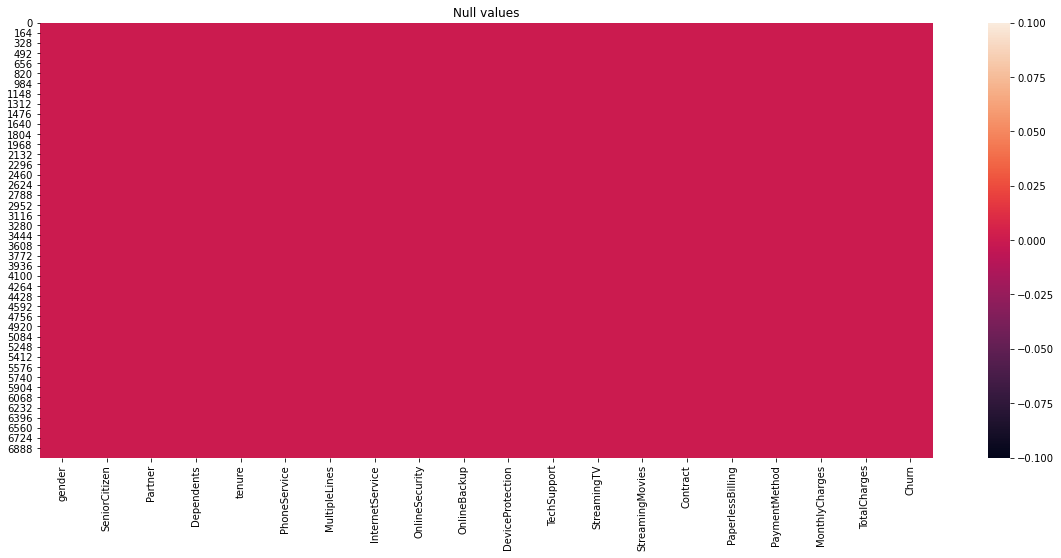

In [11]:
plt.figure(figsize=[20,8])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see no null values present in the dataset.

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Here the 'total charges' column is of object datatype, but the data present in the column are continious numeric data.

Lets check if there are empty records present with 'space' filling them.

In [14]:
df.loc[df['TotalCharges']== ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We can see some records contain 'space' in the data. we need to remove them.

In [15]:
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we have 11 null values in the total charges column, lets treat it.

In [17]:
# we need to convert it to float first, as the data are in float format.

df['TotalCharges']=df['TotalCharges'].astype(float)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

The column has been converted.

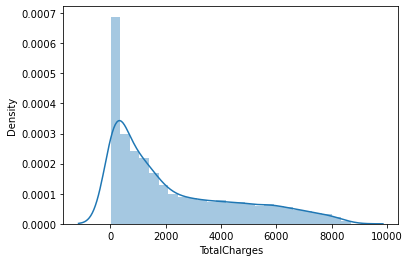

In [18]:
sns.distplot(df['TotalCharges']);

The data distribution has some skewness, lets replace the null with the median.

In [19]:
df['TotalCharges']= df['TotalCharges'].fillna(df['TotalCharges'].median())

In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Null values have been removed.

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We can check the distribution of the continious numeric data, which are monthly charges and total charges. Here the difference between the mean and median is less in the 'monthly charges' column and is somewhat high in 'total charges' so the data in 'monthly charges'should not have skewness in data. Also the difference between the mean and the maximum
 is not very high in both the columns, so the data here should be less prone to outliers.

## Visualization

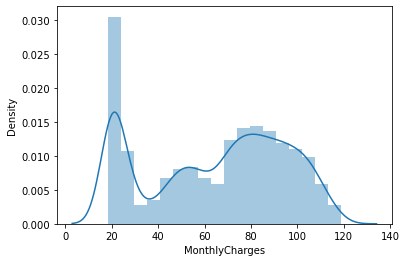

In [22]:
sns.distplot(df['MonthlyCharges']);

Data can be seen having some variance present.But no skewness can be seen.

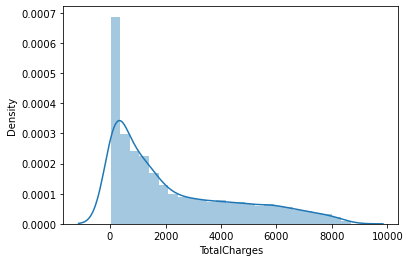

In [23]:
sns.distplot(df['TotalCharges']);

Here we can see certain skewness present in the data, right tailed skewed.

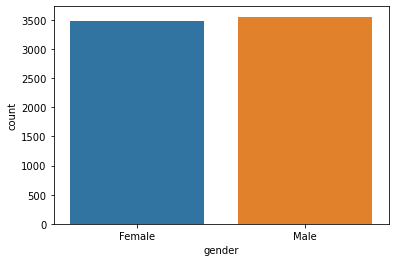

In [24]:
sns.countplot(df['gender']);

Here the data is equally distributed between the two genders.

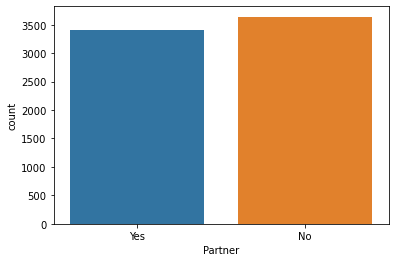

In [25]:
sns.countplot(df['Partner']);

The number of people having and not having a partner are nearly the same.

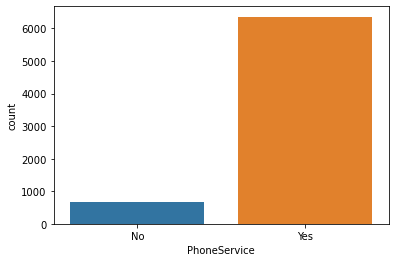

In [26]:
sns.countplot(df['PhoneService']);

Here the majority of the people can be seen having pgone service.

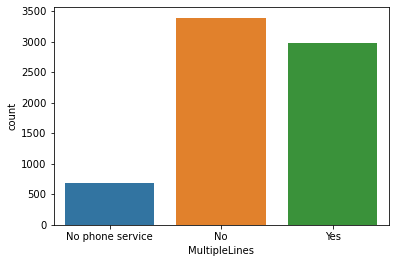

In [27]:
sns.countplot(df['MultipleLines']);

We can see here that the majority of people do not have multiple lines. and people having no phone service are very less.

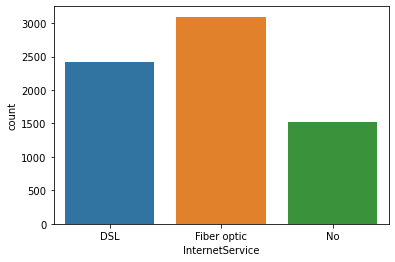

In [28]:
sns.countplot(df['InternetService']);

Here more people have a fiber optic internet service as compared to DSL, or people that dont have internet service.

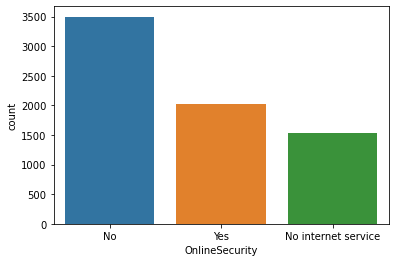

In [29]:
sns.countplot(df['OnlineSecurity']);

Here data shows majority of people not having online security.

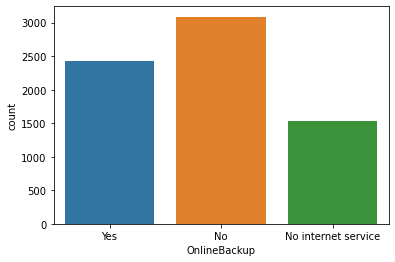

In [30]:
sns.countplot(df['OnlineBackup']);

Data shows majority of people not having online backup.

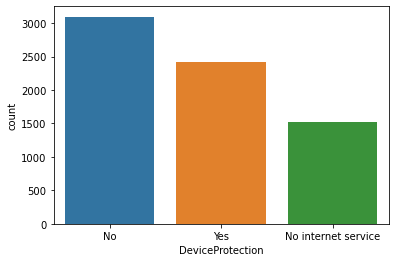

In [31]:
sns.countplot(df['DeviceProtection']);

People not having device protection are comparatively more.

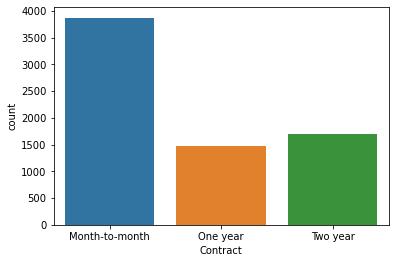

In [32]:
sns.countplot(df['Contract']);

The data shows that majority of people preffer month to month contract.

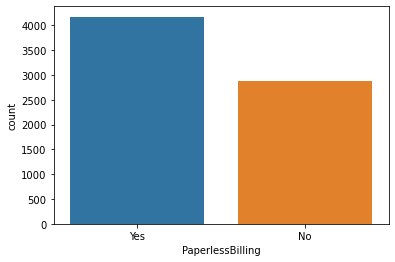

In [33]:
sns.countplot(df['PaperlessBilling']);

People performing paperless billing are more compared to paper bills.

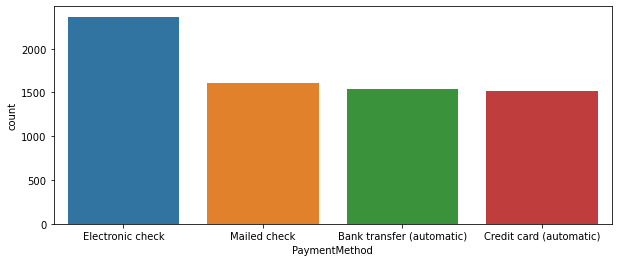

In [34]:
plt.figure(figsize=[10,4])
sns.countplot(df['PaymentMethod'])
plt.show()

The data shows most of the people doing payment through electronic checks. and other payments are done equally among the rest of the people.

#### Lets check our target for class imbalance.

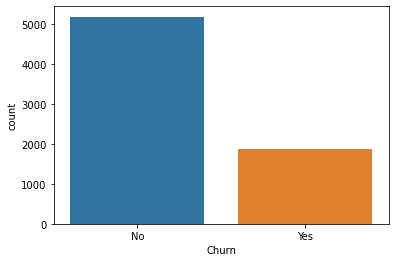

In [35]:
sns.countplot(df['Churn'])

Here we can see some imbalance present in the target, with No being the majority. But the imbalance present is of considerable amount. We will check the f1 score for accuracy. lets proceed.

## Encoding

In [36]:
for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.

We can see some of the columns alrady in encoded form, e.g 'tenure'.

In [37]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In the dataset we mostly have object type data. we need to encode them to proceed.

In [38]:
new=pd.DataFrame()
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [40]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

The dataset is now encoded.

### Checking correlation

In [41]:
cor= df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175588,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375063,-0.195525


Here we can see the correlation between all the columns, lets visualize it.

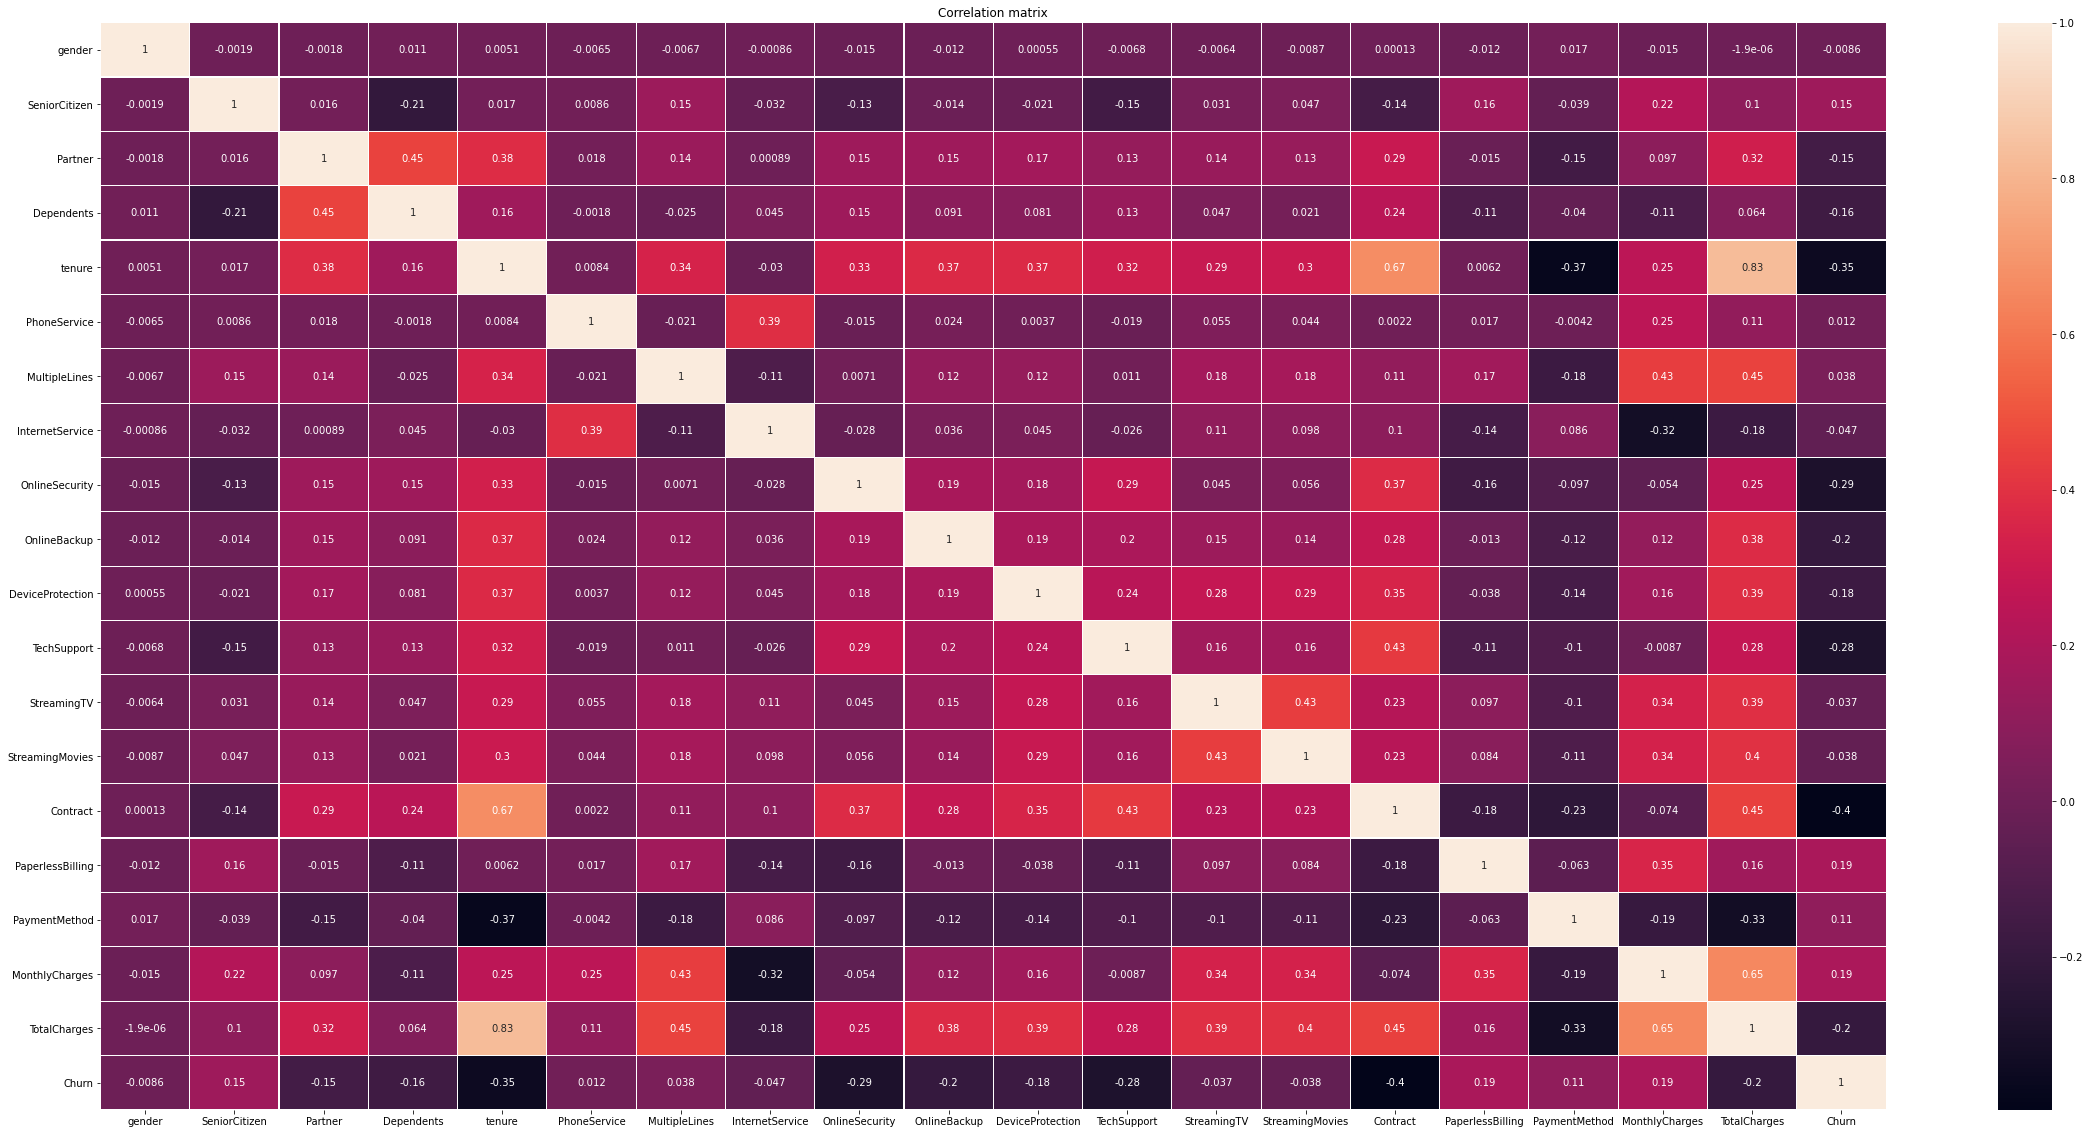

In [42]:
plt.figure(figsize=[40,20])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

Here we can see some positive as well as negative correlation in the dataset. Among the independent columns, 'tenure' and 'payment method' are showing a very negative corelation, on the other hand, 'tenure' and 'total charges' are highly positively correlated.

In [43]:
# checking correlation of target with independent columns.

cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can see no significant correlation with the target. lets visualize it for better understanding.

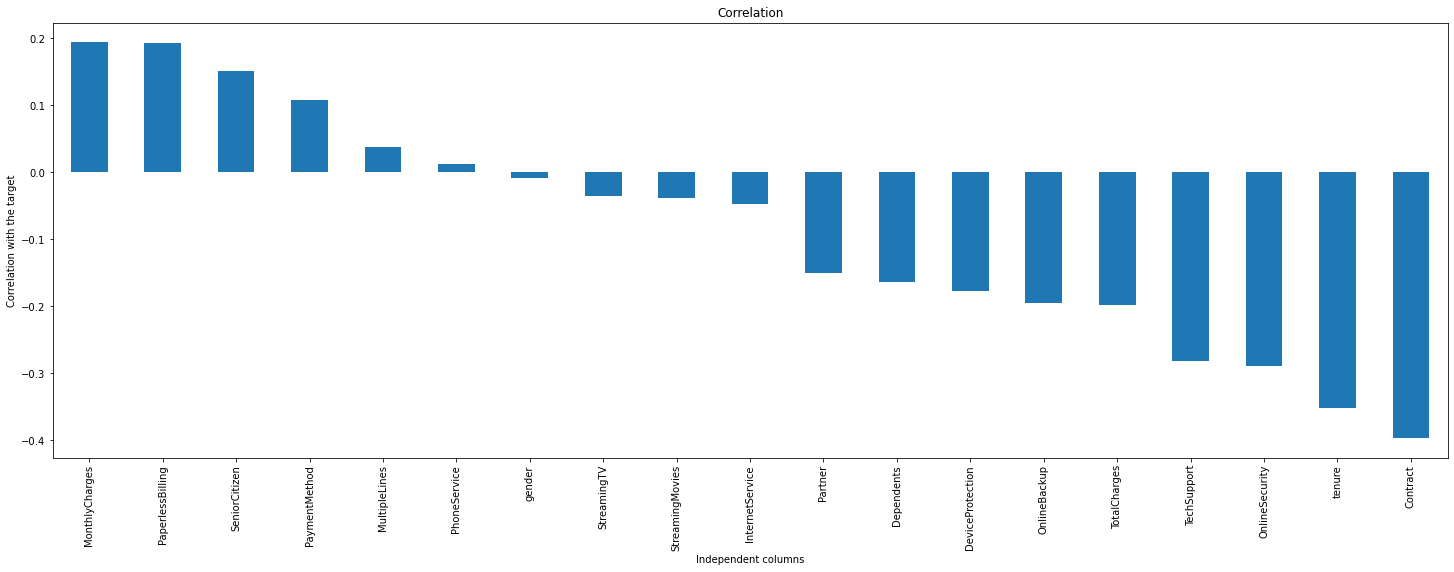

In [44]:
plt.figure(figsize=(25,8))
cor['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Independent columns')
plt.ylabel('Correlation with the target')
plt.title('Correlation')
plt.show()

We can see 'monthly charges' having the highest positive correlation with the target and 'contract' is showing a very negative correlation. The 'gender' column has a very low correlation with the target.

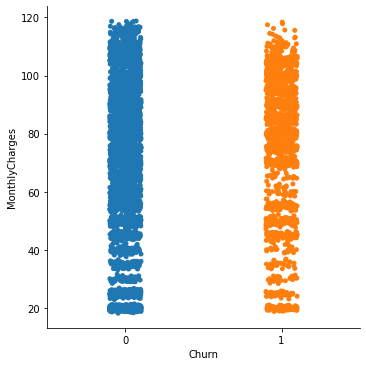

In [56]:
sns.catplot(x='Churn',y='MonthlyCharges', data=df)

We can see some positive relation here, as monthly charges increases, the probability to churn also increases.

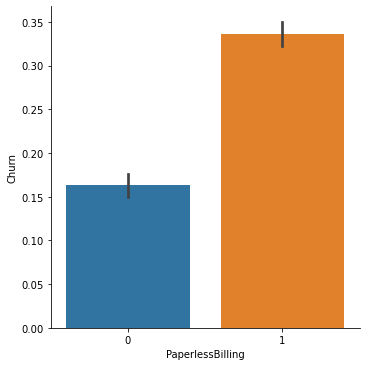

In [78]:
sns.catplot(x='PaperlessBilling',y='Churn', data=df, kind='bar');

Here we can see people doing paperless billing, churn the most.

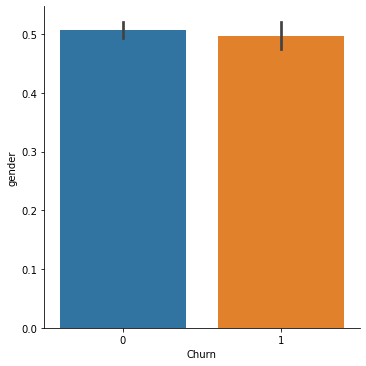

In [79]:
sns.catplot(x= 'Churn',y='gender', data=df, kind='bar')

In this data no correlation can be seen between the columns. gender has very little to do with churn.

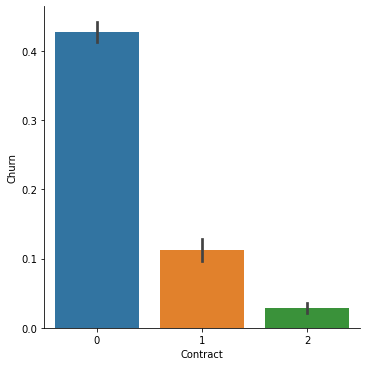

In [80]:
sns.catplot(x= 'Contract',y='Churn', data=df, kind='bar');

The graph shows people having month to month contract, churn the most.

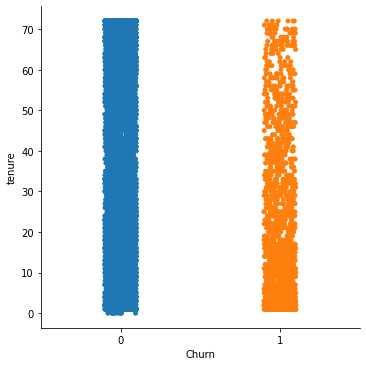

In [66]:
sns.catplot(x= 'Churn',y='tenure', data=df);

Here, we can see a negative correlation, with datapoints geting reduced from the top. with descreasing tenure the probability of churn increases.

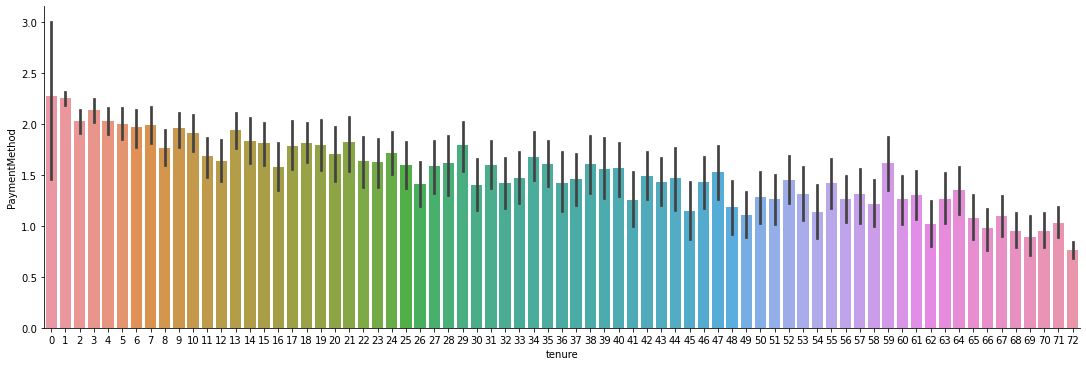

In [87]:
sns.catplot(x= 'tenure',y='PaymentMethod', data=df, kind='bar', aspect=3);

The graph shows that With long tenure, the payment method changes to automatic bank transfer from mailed checks.

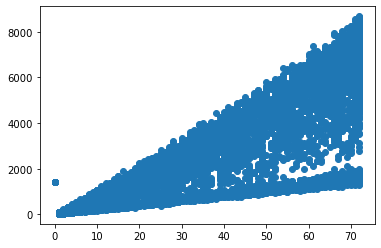

In [70]:
plt.scatter(df['tenure'],df['TotalCharges'])
plt.show()

Here the graph shows the most positive correlation among the independent columns. total charges increases with tenure.

## Checking outliers

Lets check for outliers in the continious data columns.

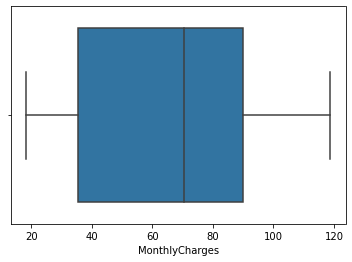

In [88]:
sns.boxplot(df['MonthlyCharges'])

No outliers present here.

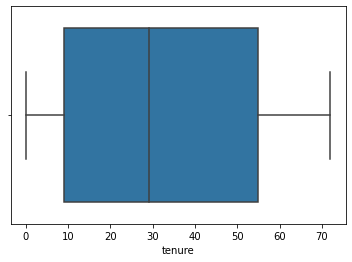

In [89]:
sns.boxplot(df['tenure'])

No outliers can be seen here.

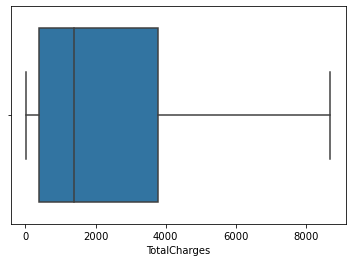

In [90]:
sns.boxplot(df['TotalCharges'])

No outliers can be seen.

The dataset has no outliers present. Lets proceed.

### Checking skewness for the continious data column

In [91]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

Here no high skewness can be seen in the non-categorical data columns. So we can proceed.

## Scaling

In [116]:
# Lets split the data into x and y first.

x=df.drop('Churn', axis=1)
y= df['Churn']

In [117]:
from sklearn.preprocessing import StandardScaler


scaler= StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994242
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173244
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.959674
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.194766
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.128655
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.243151
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.854469
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872062


## Finding best random state

In [118]:
from sklearn.linear_model import LogisticRegression

maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= accuracy_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.8211243611584327 on random state 35


In [119]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.25,random_state=35)

## Model creation

In [120]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print(accuracy_score(y_test,predlr),'\n')
print(confusion_matrix(y_test,predlr),'\n')
print(classification_report(y_test,predlr),'\n')

0.8211243611584327 

[[1190  122]
 [ 193  256]] 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1312
           1       0.68      0.57      0.62       449

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.82      0.82      1761
 



In [121]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print(accuracy_score(y_test,preddt),'\n')
print(confusion_matrix(y_test,preddt),'\n')
print(classification_report(y_test,preddt),'\n')

0.7348097671777399 

[[1074  238]
 [ 229  220]] 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1312
           1       0.48      0.49      0.49       449

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.74      0.73      0.74      1761
 



In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn),'\n')
print(confusion_matrix(y_test,predknn),'\n')
print(classification_report(y_test,predknn))

0.7643384440658717 

[[1118  194]
 [ 221  228]] 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1312
           1       0.54      0.51      0.52       449

    accuracy                           0.76      1761
   macro avg       0.69      0.68      0.68      1761
weighted avg       0.76      0.76      0.76      1761



In [122]:
from sklearn.ensemble import RandomForestClassifier

fr=RandomForestClassifier()
fr.fit(x_train,y_train)
predfr= fr.predict(x_test)

print(accuracy_score(y_test,predfr),'\n')
print(confusion_matrix(y_test,predfr),'\n')
print(classification_report(y_test,predfr),'\n')

0.8018171493469619 

[[1194  118]
 [ 231  218]] 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1312
           1       0.65      0.49      0.56       449

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.79      0.80      0.79      1761
 



In [99]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
preds= svc.predict(x_test)

print(accuracy_score(y_test,preds),'\n')
print(confusion_matrix(y_test,preds),'\n')
print(classification_report(y_test,preds),'\n')

0.8114707552526973 

[[1215   97]
 [ 235  214]] 

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1312
           1       0.69      0.48      0.56       449

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.80      0.81      0.80      1761
 



In [139]:
from sklearn.naive_bayes import GaussianNB

gnb= GaussianNB()
gnb.fit(x_train,y_train)
predgnb= gnb.predict(x_test)

print(accuracy_score(y_test,predgnb),'\n')
print(confusion_matrix(y_test,predgnb),'\n')
print(classification_report(y_test,predgnb))

0.7705848949460534 

[[1019  293]
 [ 111  338]] 

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1312
           1       0.54      0.75      0.63       449

    accuracy                           0.77      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.81      0.77      0.78      1761



Here GaussianNB and logistic reg. are giving us the best f1 scores. Lets check cv score for over and under fitting.

## Cross validation

In [140]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,scoring="f1",cv=5)

print('cross validation score for logistic reg model: ', scr.mean())

cross validation score for logistic reg model:  0.5941572471639458


In [141]:
scr= cross_val_score(dt,x,y,scoring="f1",cv=5)

print('cross validation score for decision tree model: ', scr.mean())

cross validation score for decision tree model:  0.4933805518147672


In [142]:
scr= cross_val_score(knn,x,y,scoring="f1",cv=5)

print('cross validation score for k nearest neighbour model: ', scr.mean())

cross validation score for k nearest neighbour model:  0.5174462288384799


In [143]:
scr= cross_val_score(fr,x,y,scoring="f1",cv=5)

print('cross validation score for random forest model: ', scr.mean())

cross validation score for random forest model:  0.5524184358007314


In [144]:
scr= cross_val_score(svc,x,y,scoring="f1",cv=5)

print('cross validation score for support vector classifier model: ', scr.mean())

cross validation score for support vector classifier model:  0.556324330808353


In [146]:
scr= cross_val_score(gnb,x,y,scoring="f1",cv=5)

print('cross validation score for GaussianNB model: ', scr.mean())

cross validation score for GaussianNB model:  0.6135976399573916


Here too Logistic reg. and GaussianNB are giving us the best score, and the difference between the f1 score and cv score is nearly same in both models. Lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [147]:
from sklearn.model_selection import GridSearchCV

In [123]:
par1={'penalty' : ['l1', 'l2', 'elasticnet'], 'multi_class' : ['auto', 'ovr', 'multinomial'], 'max_iter': [100,150,200]}

gcvlr= GridSearchCV(lr,par1,cv=5)
gcvlr.fit(x_train,y_train)
gcvlr.best_params_

{'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}

In [128]:
# Now using the above parameter which is found to be best, we create our model.

lr_model= LogisticRegression(penalty= 'l2', multi_class= 'multinomial', max_iter=100)
lr_model.fit(x_train,y_train)
predf1=lr_model.predict(x_test)

print(accuracy_score(y_test,predf1),'\n')
print(confusion_matrix(y_test,predf1),'\n')
print(classification_report(y_test,predf1))

0.8199886428165815 

[[1188  124]
 [ 193  256]] 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1312
           1       0.67      0.57      0.62       449

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.75      1761
weighted avg       0.81      0.82      0.81      1761



Using Logistic regression, we are getting an f1 score of 88% and 62% for 0 and 1, and an accuracy score of 82%.

In [150]:
# GaussianNB

par2={'var_smoothing': [1e-11, 1e-10, 1e-9]}

gcvgnb= GridSearchCV(gnb,par2,cv=5)
gcvgnb.fit(x_train,y_train)
gcvgnb.best_params_

{'var_smoothing': 1e-11}

In [152]:
# Now we create our model, using the best parameters.

gnb_model= GaussianNB(var_smoothing= 1e-11)
gnb_model.fit(x_train,y_train)
predf2=gnb_model.predict(x_test)
print(accuracy_score(y_test,predf2),'\n')
print(confusion_matrix(y_test,predf2),'\n')
print(classification_report(y_test,predf2))

0.7705848949460534 

[[1019  293]
 [ 111  338]] 

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1312
           1       0.54      0.75      0.63       449

    accuracy                           0.77      1761
   macro avg       0.72      0.76      0.73      1761
weighted avg       0.81      0.77      0.78      1761



With GaussianNB, we are getting f1 score of 83% and 63% for 0 and 1, and an accuracy score of 77%

### AUC ROC Curve

In [153]:
from sklearn.metrics import plot_roc_curve

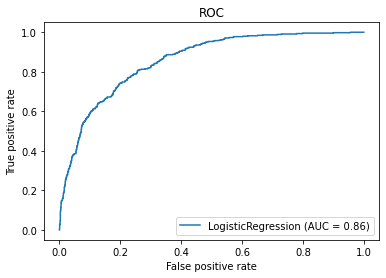

In [154]:
plot_roc_curve(lr_model,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

Here using logistic regression, the area under the curve is found to be 86%

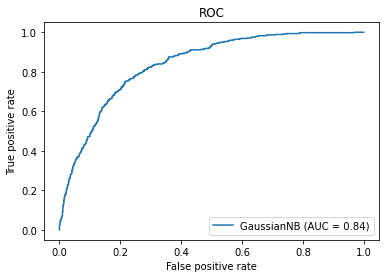

In [155]:
plot_roc_curve(gnb_model,x_test,y_test)
plt.title('ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

With GaussianNB, the area under the curve is found to be 84%

By analysing both the model we have found that Logistic regression model is giving us a higher f1 score and accuracy score, Also the AUC value is more in logistic reg model, Hence we make Logistic regression our final model.

## Saving the model

In [156]:
import joblib

joblib.dump(lr_model,'customer_churn.pkl')

['customer_churn.pkl']